<a href="https://colab.research.google.com/github/gitnicolas343/TAM_2024_2/blob/main/TAM_P1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***PARCIAL 1:TEORIA DE APRENDIZAJE DE MAQUINA***



---
SADI NICOLAS MENDOZA SORIANO

ING FISICA

COD 1007569088


PREGUNTA 2:

Utilizando un esquema de validacion cruzada de 5 folds, compare el rendimiento de los siguientes regresores
sobre el conjunto de datos NBA scored prediction de Kaggle:

• LinearRegresor

• Lasso

• ElasticNet

• KernelRidge

• SGDRegressor

• BayesianRidge

• Gaussian Process Regressor

• RandomForestRegressor

• Support Vector Machines Regressor

fijando el score del gridsearch en terminos del error absoluto medio y el error cuadratico medio (MAE y MSE). Justifique los
hiperparametros a buscar y la rejilla de valores escogida para cada algoritmo segun los modelos estudiados en clase. Finalmente,
presente los rendimientos promedios en los datos de evaluacion con su respectiva desviacion estandar para las siguientes medidas
de desempeño: MAE, MSE, R2 (consultar) y MAPE (consultar).

In [1]:
#importaciones
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Importar librerías necesarias
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Definir la ruta del archivo
file_path = '/content/drive/My Drive/PARCIAL1TAM/2023_nba_player_stats.csv'

# Cargar el archivo CSV
df = pd.read_csv(file_path)

df


Mounted at /content/drive


,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Alondes Williams,NaN,BKN,23,1,1,0,5.3,0,0,...,1,0,2,0,0,1,-1,0,0,-5
535,Deonte Burton,NaN,SAC,29,2,1,1,6.5,0,0,...,0,0,0,0,0,0,0,0,0,5
536,Frank Jackson,NaN,UTA,24,1,0,1,5.0,0,0,...,2,1,0,0,0,0,4,0,0,-2
537,Michael Foster Jr.,NaN,PHI,20,1,1,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,-2


**ANALISIS EXPLORATORIO PREVIO**

In [3]:
print(f'la base datos posee {df.shape} datos y columnas' ) #info de datos

la base datos posee (539, 30) datos y columnas


In [4]:
#vamos a verificar los odjetos que hay en el df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [5]:
print(f'valores faltantes: {df.isnull().sum()}') #buscamos los valores desconocidos

valores faltantes: PName    0
POS      5
Team     0
Age      0
GP       0
W        0
L        0
Min      0
PTS      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%      0
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
TOV      0
STL      0
BLK      0
PF       0
FP       0
DD2      0
TD3      0
+/-      0
dtype: int64


In [6]:
#hay valores faltantes  en la columna posiciones que hace referencia a el juego en el que jugo junto con su
#posicion es conveniente pasarla a la posicion SG
if 'POS' in df.columns:
    df['POS'] = df['POS'].fillna('SG')

#este es un promp de IA 'como reemplazar valores faltantes'

In [7]:
print(f'valores faltantes: {df.isnull().sum()}')
#buscamos los valores desconocidos y en esta ocasion ya no hay

valores faltantes: PName    0
POS      0
Team     0
Age      0
GP       0
W        0
L        0
Min      0
PTS      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%      0
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
TOV      0
STL      0
BLK      0
PF       0
FP       0
DD2      0
TD3      0
+/-      0
dtype: int64


In [8]:
#buscamos valores duplicados

print("numero de valores duplicado: ",df.duplicated().sum())

#no hay valores duplicados.

numero de valores duplicado:  0


In [9]:
#voy a cambiar el nombre de las columnas  para que sea sencillo ubicarlas

df.rename(columns={
    'PName': 'Jugador','POS': 'Posición','Team': 'Equipo','Age': 'Edad','GP': 'Partidos_Jugados',
    'W': 'Ganados','L': 'Perdidos','Min': 'Minutos','PTS': 'Puntos','FGM': 'Canastas_Encestadas',
    'FGA': 'Canastas_Intentadas','FG%': 'Porcentaje_Canastas','3PM': 'Triples_Encestados','3PA': 'Triples_Intentados',
    '3P%': 'Porcentaje_Triples','FTM': 'Tiros_Libres_Encestados','FTA': 'Tiros_Libres_Intentados',
    'FT%': 'Porcentaje_Tiros_Libres','OREB': 'Rebotes_Ofensivos','DREB': 'Rebotes_Defensivos',
    'REB': 'Rebotes_Totales','AST': 'Asistencias','TOV': 'Pérdidas','STL': 'Robos','BLK': 'Bloqueos',
    'PF': 'Faltas','FP': 'Puntos_Fantasy','DD2': 'Dobles_Dobles', 'TD3': 'Triples_Dobles','+/-': 'Mas_Menos'}, inplace=True)



In [10]:
df.head() #comprobamos los cambios

,Jugador,Posición,Equipo,Edad,Partidos_Jugados,Ganados,Perdidos,Minutos,Puntos,Canastas_Encestadas,...,Rebotes_Totales,Asistencias,Pérdidas,Robos,Bloqueos,Faltas,Puntos_Fantasy,Dobles_Dobles,Triples_Dobles,Mas_Menos
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


In [11]:
#hay datos tipo odjeto segun el codigo info  en las columnas jugador posicion y equipo
#se uso un promp de IA 'como verificar el tipo de odjeto espcifico de los elementos de una columna'

print(f'jugador: {df["Jugador"].apply(type).unique()}')
print(f'posicion : {df["Posición"].apply(type).unique()}')
print(f'posicion : {df["Posición"].apply(type).unique()}') #verificar el tipo de odjeto especifico
print(f'posicion : {df["Posición"].apply(type).unique()}')


jugador: [<class 'str'>]
posicion : [<class 'str'>]
posicion : [<class 'str'>]
posicion : [<class 'str'>]


In [12]:
#vamos a formatear las columnas para que los estring no tenga 'inconvenientes'
#tipograficos y se puedan referenciar facilmente

df['Jugador'] = df['Jugador'].str.upper()  # colocar los datos en mayusculas
df['Posición'] = df['Posición'].str.strip()  # eliminar espacios
df['Equipo'] = df['Equipo'].str.upper()  # texto a mayuscula

In [13]:
#verificamos

df

,Jugador,Posición,Equipo,Edad,Partidos_Jugados,Ganados,Perdidos,Minutos,Puntos,Canastas_Encestadas,...,Rebotes_Totales,Asistencias,Pérdidas,Robos,Bloqueos,Faltas,Puntos_Fantasy,Dobles_Dobles,Triples_Dobles,Mas_Menos
0,JAYSON TATUM,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,JOEL EMBIID,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,LUKA DONCIC,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,SHAI GILGEOUS-ALEXANDER,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,GIANNIS ANTETOKOUNMPO,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,ALONDES WILLIAMS,SG,BKN,23,1,1,0,5.3,0,0,...,1,0,2,0,0,1,-1,0,0,-5
535,DEONTE BURTON,SG,SAC,29,2,1,1,6.5,0,0,...,0,0,0,0,0,0,0,0,0,5
536,FRANK JACKSON,SG,UTA,24,1,0,1,5.0,0,0,...,2,1,0,0,0,0,4,0,0,-2
537,MICHAEL FOSTER JR.,SG,PHI,20,1,1,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,-2


In [14]:
#odservamos como se encuentran los datos numericos
df.describe(include= np.number)

,Edad,Partidos_Jugados,Ganados,Perdidos,Minutos,Puntos,Canastas_Encestadas,Canastas_Intentadas,Porcentaje_Canastas,Triples_Encestados,...,Rebotes_Totales,Asistencias,Pérdidas,Robos,Bloqueos,Faltas,Puntos_Fantasy,Dobles_Dobles,Triples_Dobles,Mas_Menos
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.970315,48.040816,24.018553,24.022263,1103.617625,523.426716,191.576994,403.005566,46.325232,56.324675,...,198.254174,115.545455,61.300557,33.270872,21.241187,91.181818,1036.938776,4.011132,0.220779,0.000000
std,4.315513,24.650686,14.496366,13.445866,827.765114,498.084360,178.351286,369.595909,10.967271,60.916821,...,181.819962,129.578453,58.279185,28.336745,26.529238,66.206731,894.081896,8.770932,1.564432,148.223909
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-642.000000
25%,23.000000,30.500000,12.000000,14.000000,329.000000,120.500000,45.500000,93.500000,41.650000,5.000000,...,50.500000,22.000000,14.500000,8.500000,5.000000,32.000000,254.000000,0.000000,0.000000,-70.000000
50%,25.000000,54.000000,25.000000,25.000000,970.200000,374.000000,138.000000,300.000000,45.500000,36.000000,...,159.000000,69.000000,44.000000,28.000000,13.000000,86.000000,810.000000,0.000000,0.000000,-7.000000
75%,29.000000,68.000000,36.000000,34.000000,1845.900000,769.500000,283.500000,598.500000,50.600000,92.000000,...,286.000000,162.500000,92.500000,51.000000,28.000000,140.000000,1646.000000,3.000000,0.000000,57.000000
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,...,973.000000,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000


In [15]:
#odservamos como se encuentran los datos str

df.describe(include= 'object')

,Jugador,Posición,Equipo
count,539,539,539
unique,539,7,30
top,JAYSON TATUM,SG,DAL
freq,1,101,21


**VISUALIZACION**

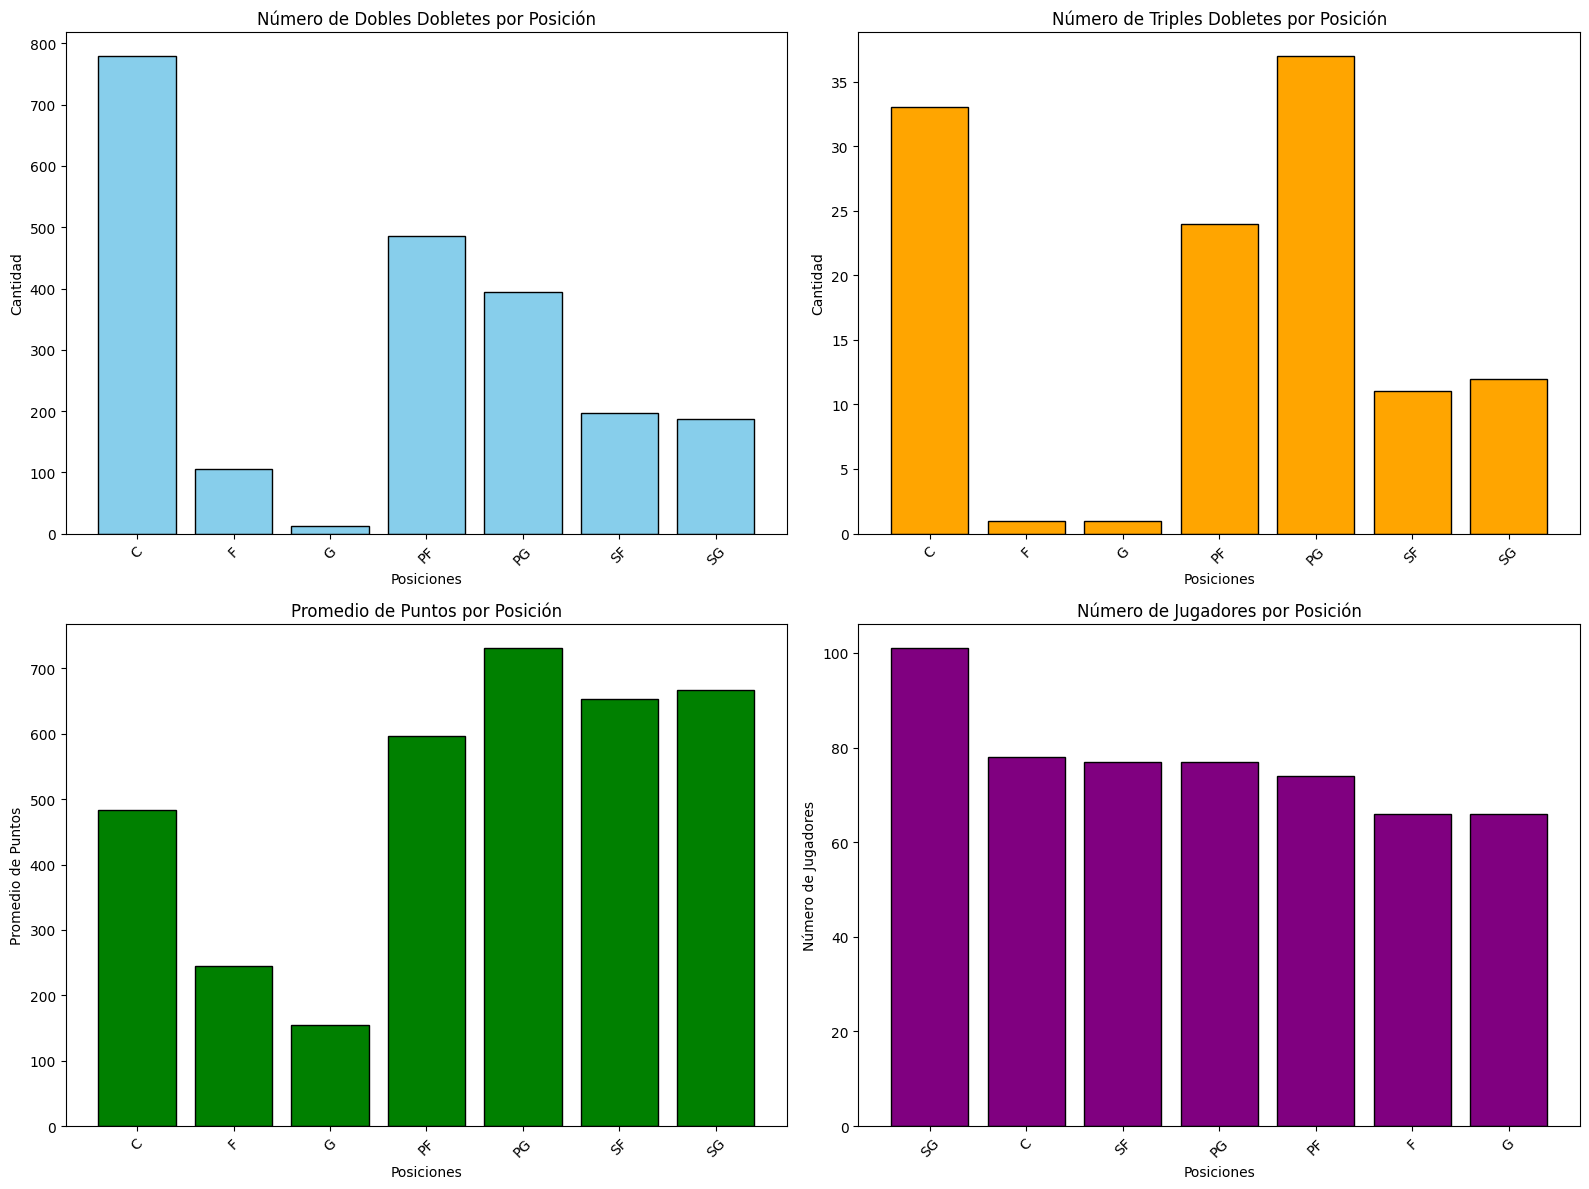

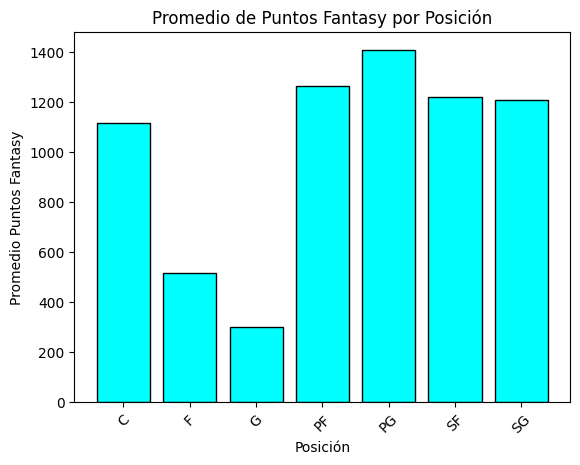

In [16]:
#en esta celda se uso el siguiente promp y se adapto al conjunto de datos:
'genera histogramas para  , Número de Dobles y Triples Dobletes por Posición, promedio de puntos por posición, Número de jugadores por posición'
'Promedio de puntos fantasy por posición en subgraficos ordenados'

# Número de Dobles y Triples Dobletes por Posición
dobles_por_posicion = df.groupby('Posición')['Dobles_Dobles'].sum()
triples_por_posicion = df.groupby('Posición')['Triples_Dobles'].sum()

# Promedio de puntos por posición
avg_points_by_position = df.groupby('Posición')['Puntos'].mean()

# Número de jugadores por posición
position_counts = df['Posición'].value_counts()

# Promedio de puntos fantasy por posición
promedio_fantasy_por_posicion = df.groupby('Posición')['Puntos_Fantasy'].mean()

# Crear figura con subgráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Número de Dobles Dobletes por Posición
axes[0, 0].bar(dobles_por_posicion.index, dobles_por_posicion.values, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Número de Dobles Dobletes por Posición')
axes[0, 0].set_xlabel('Posiciones')
axes[0, 0].set_ylabel('Cantidad')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Número de Triples Dobletes por Posición
axes[0, 1].bar(triples_por_posicion.index, triples_por_posicion.values, color='orange', edgecolor='black')
axes[0, 1].set_title('Número de Triples Dobletes por Posición')
axes[0, 1].set_xlabel('Posiciones')
axes[0, 1].set_ylabel('Cantidad')
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: Promedio de Puntos por Posición
axes[1, 0].bar(avg_points_by_position.index, avg_points_by_position.values, color='green', edgecolor='black')
axes[1, 0].set_title('Promedio de Puntos por Posición')
axes[1, 0].set_xlabel('Posiciones')
axes[1, 0].set_ylabel('Promedio de Puntos')
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Número de Jugadores por Posición
axes[1, 1].bar(position_counts.index, position_counts.values, color='purple', edgecolor='black')
axes[1, 1].set_title('Número de Jugadores por Posición')
axes[1, 1].set_xlabel('Posiciones')
axes[1, 1].set_ylabel('Número de Jugadores')
axes[1, 1].tick_params(axis='x', rotation=45)

# Ajuste del diseño
plt.tight_layout()
plt.show()

# Gráfico adicional: Promedio de Puntos Fantasy por Posición
plt.bar(promedio_fantasy_por_posicion.index, promedio_fantasy_por_posicion.values, color='cyan', edgecolor='black')
plt.title('Promedio de Puntos Fantasy por Posición')
plt.xlabel('Posición')
plt.ylabel('Promedio Puntos Fantasy')
plt.xticks(rotation=45)
plt.show()


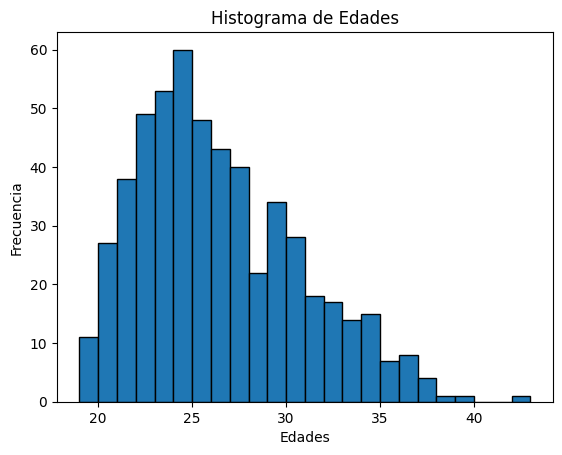

In [17]:
#distribucion de esdades

plt.hist(df['Edad'], bins=range(df['Edad'].min(), df['Edad'].max() + 2), edgecolor='black') #parametros del histograma
plt.xlabel('Edades')    #gaficacion
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')
plt.show()


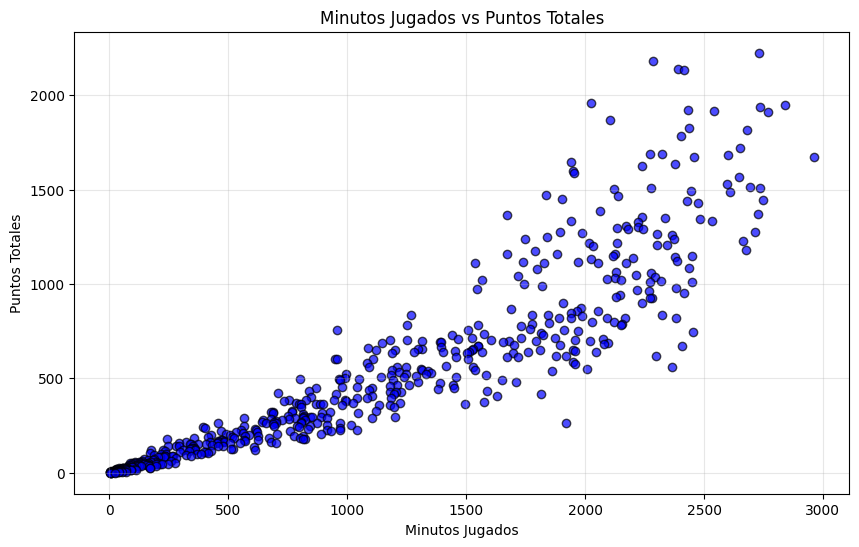

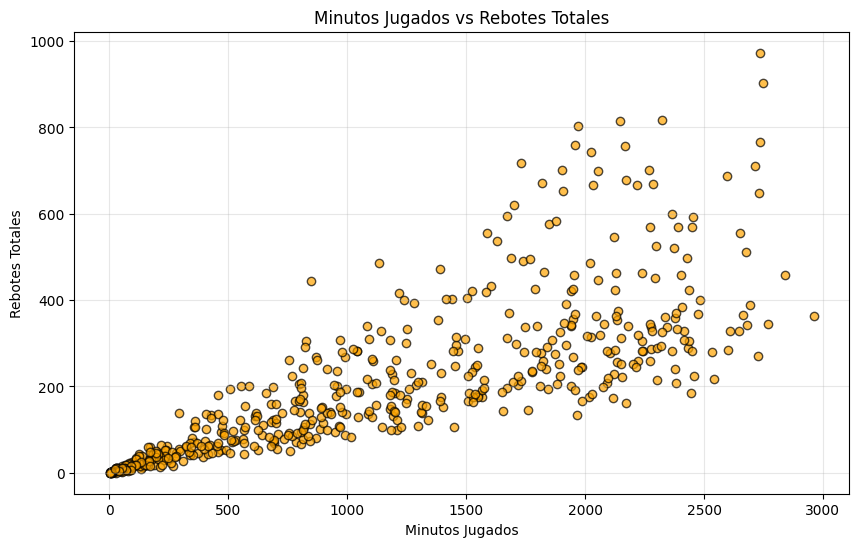

In [18]:
# Gráfico de dispersión para Minutos Jugados vs Puntos Totales
plt.figure(figsize=(10, 6))
plt.scatter(df['Minutos'], df['Puntos'], alpha=0.7, color='blue', edgecolor='black')
plt.title('Minutos Jugados vs Puntos Totales')
plt.xlabel('Minutos Jugados')
plt.ylabel('Puntos Totales')
plt.grid(alpha=0.3)
plt.show()

# Gráfico de dispersión para Minutos Jugados vs Rebotes Totales
plt.figure(figsize=(10, 6))
plt.scatter(df['Minutos'], df['Rebotes_Totales'], alpha=0.7, color='orange', edgecolor='black')
plt.title('Minutos Jugados vs Rebotes Totales')
plt.xlabel('Minutos Jugados')
plt.ylabel('Rebotes Totales')
plt.grid(alpha=0.3)
plt.show()



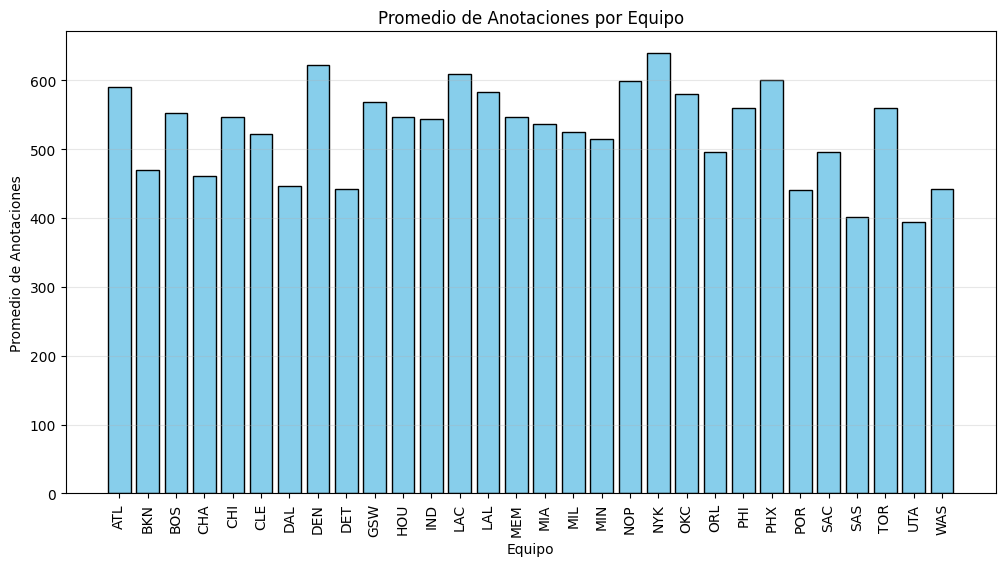

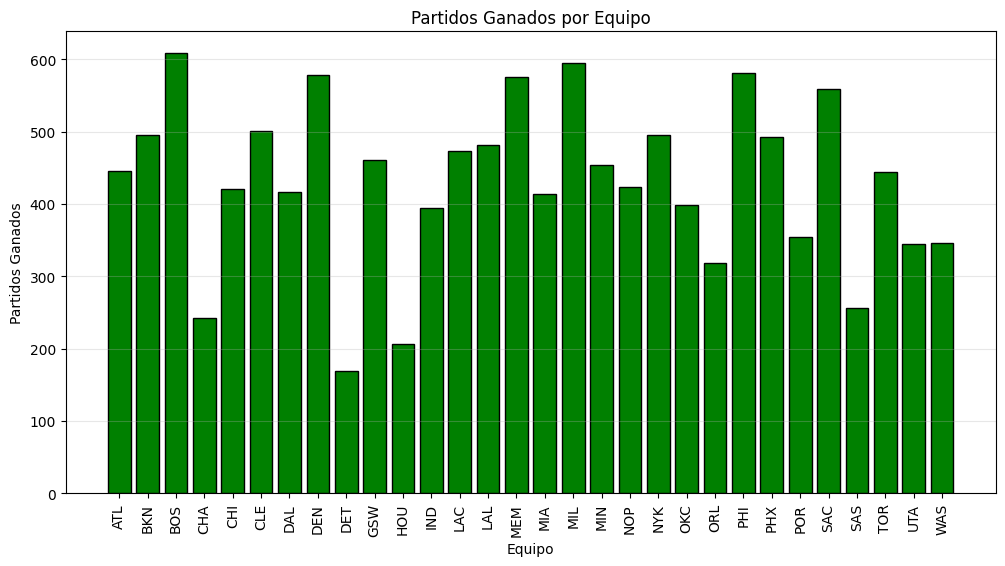

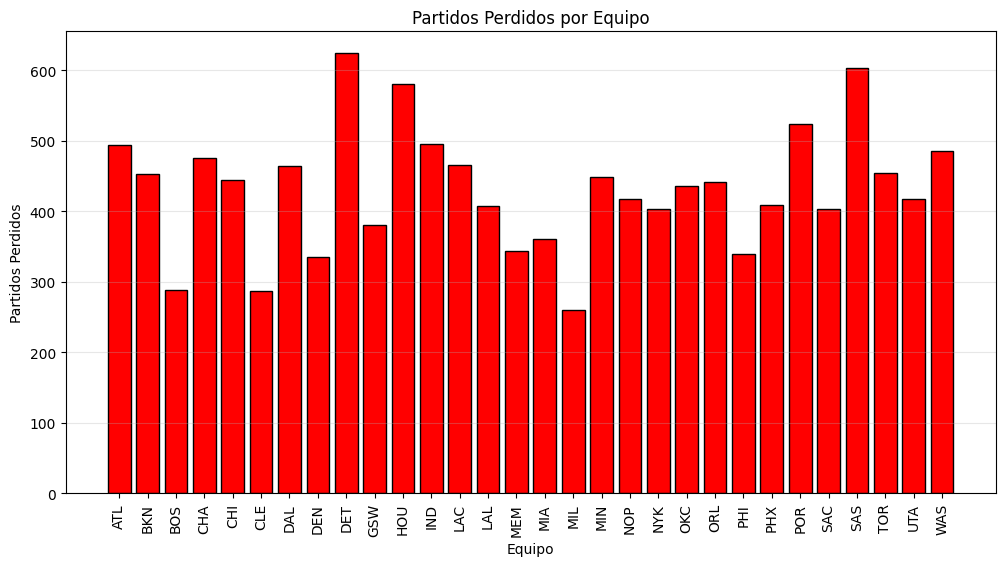

In [19]:
# Promedio de anotaciones por equipo
avg_points_by_team = df.groupby('Equipo')['Puntos'].mean()
plt.figure(figsize=(12, 6))
plt.bar(avg_points_by_team.index, avg_points_by_team.values, color='skyblue', edgecolor='black')
plt.xlabel('Equipo')
plt.ylabel('Promedio de Anotaciones')
plt.title('Promedio de Anotaciones por Equipo')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Partidos ganados por equipo
games_won_by_team = df.groupby('Equipo')['Ganados'].sum()
plt.figure(figsize=(12, 6))
plt.bar(games_won_by_team.index, games_won_by_team.values, color='green', edgecolor='black')
plt.xlabel('Equipo')
plt.ylabel('Partidos Ganados')
plt.title('Partidos Ganados por Equipo')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Partidos perdidos por equipo
games_lost_by_team = df.groupby('Equipo')['Perdidos'].sum()
plt.figure(figsize=(12, 6))
plt.bar(games_lost_by_team.index, games_lost_by_team.values, color='red', edgecolor='black')
plt.xlabel('Equipo')
plt.ylabel('Partidos Perdidos')
plt.title('Partidos Perdidos por Equipo')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.show()


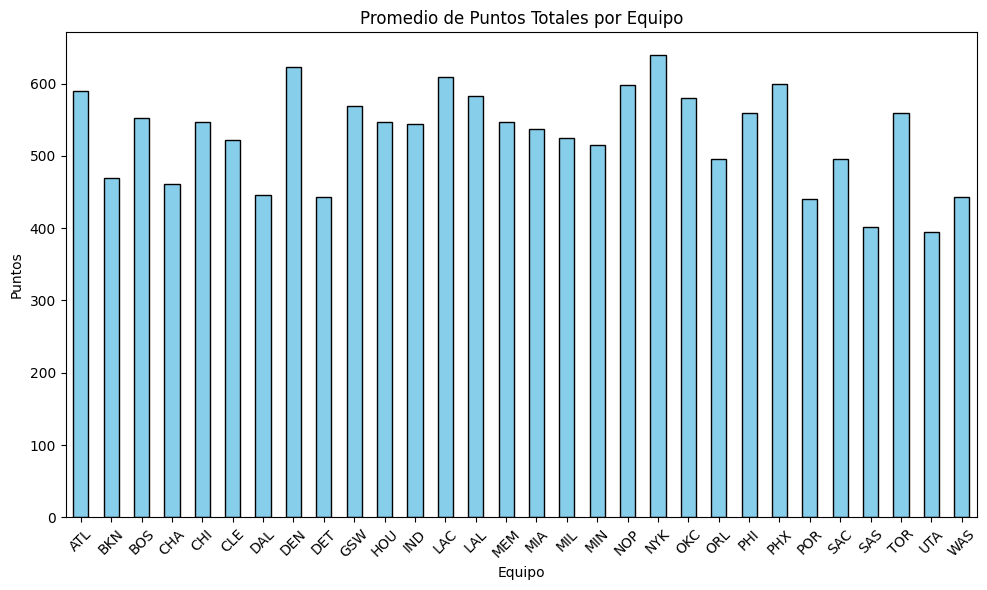

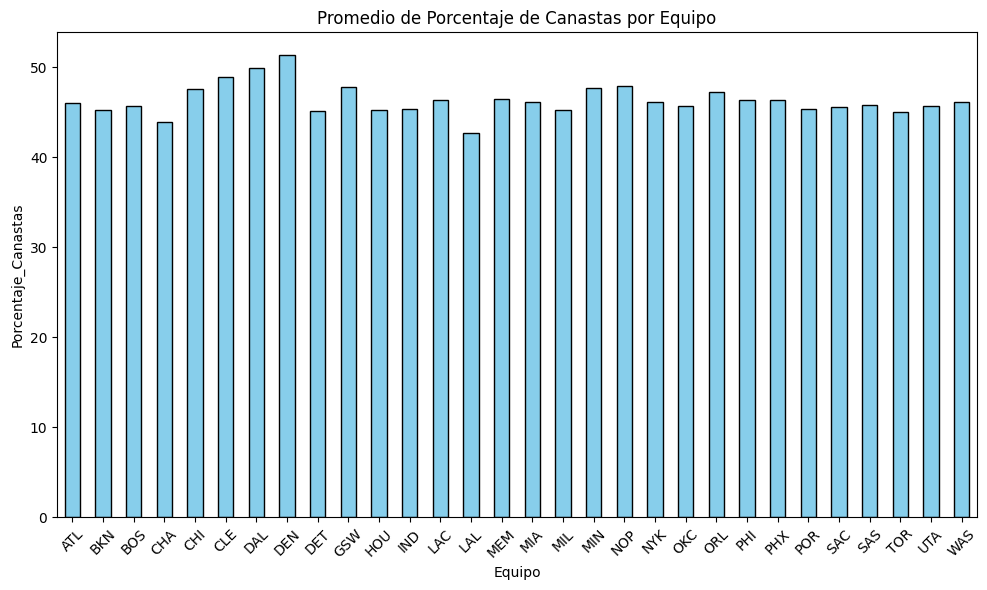

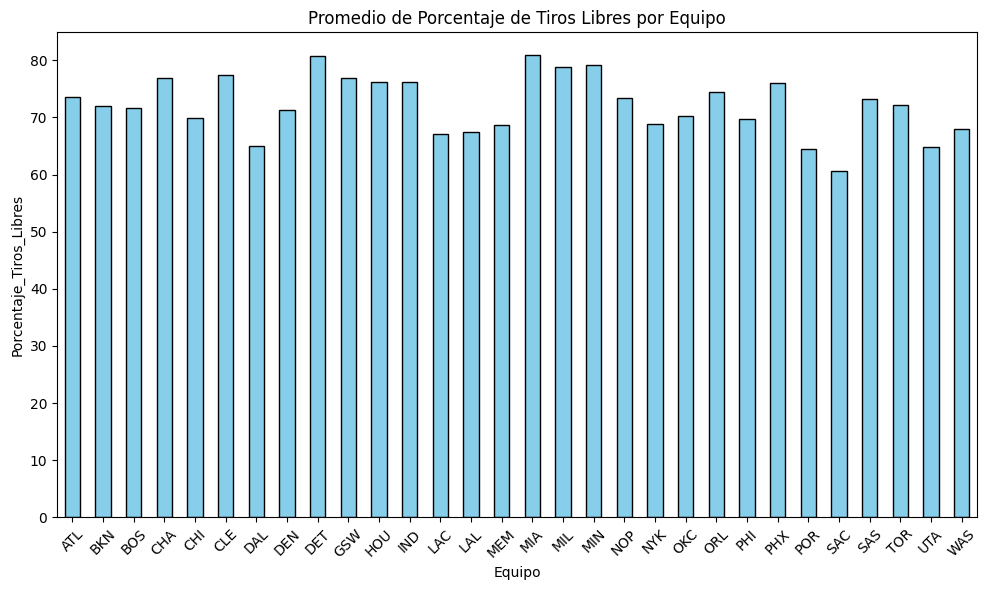

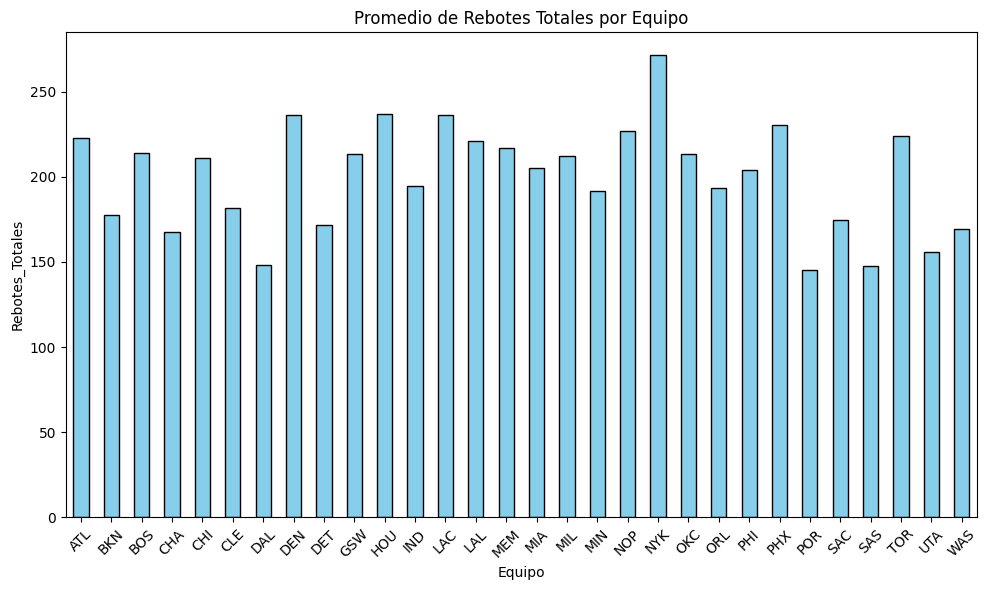

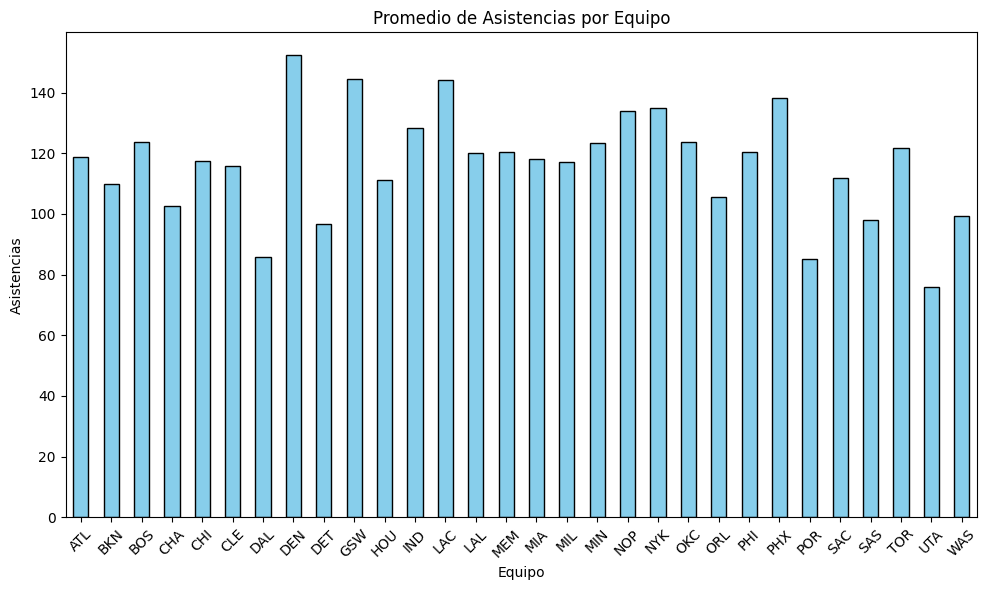

In [20]:
import matplotlib.pyplot as plt

# Agrupar por equipo y calcular el promedio
team_stats = df.groupby('Equipo').mean(numeric_only=True)

# Crear gráficos de barras para las métricas
metrics = {
    'Puntos': 'Promedio de Puntos Totales por Equipo',
    'Porcentaje_Canastas': 'Promedio de Porcentaje de Canastas por Equipo',
    'Porcentaje_Tiros_Libres': 'Promedio de Porcentaje de Tiros Libres por Equipo',
    'Rebotes_Totales': 'Promedio de Rebotes Totales por Equipo',
    'Asistencias': 'Promedio de Asistencias por Equipo'
}

# Iterar sobre las métricas para graficarlas
for metric, title in metrics.items():
    plt.figure(figsize=(10, 6))
    team_stats[metric].plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Equipo')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


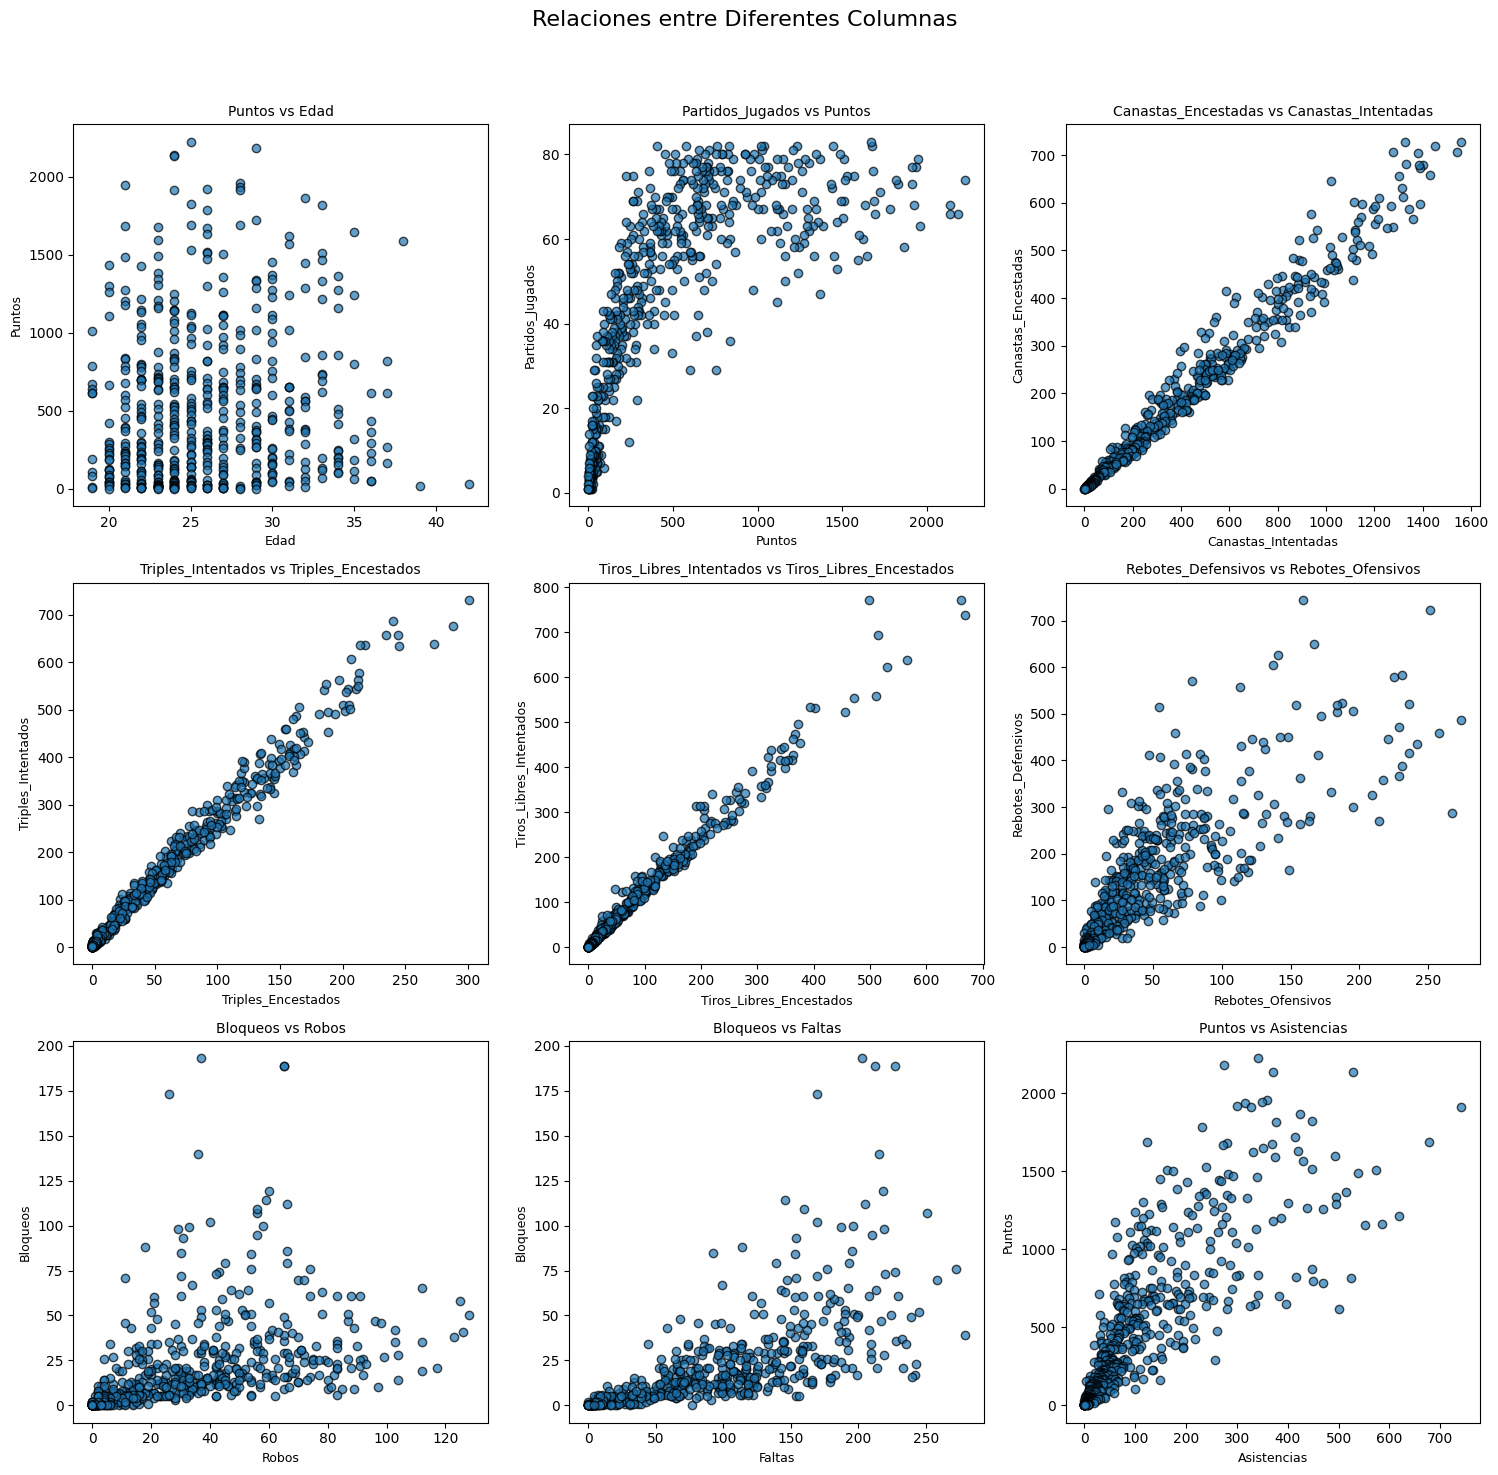

In [21]:
import matplotlib.pyplot as plt

# Definir las relaciones a analizar
relaciones = [
    ('Edad', 'Puntos'),
    ('Puntos', 'Partidos_Jugados'),
    ('Canastas_Intentadas', 'Canastas_Encestadas'),
    ('Triples_Encestados', 'Triples_Intentados'),
    ('Tiros_Libres_Encestados', 'Tiros_Libres_Intentados'),
    ('Rebotes_Ofensivos', 'Rebotes_Defensivos'),
    ('Robos', 'Bloqueos'),
    ('Faltas', 'Bloqueos'),
    ('Asistencias', 'Puntos')
]

# Configurar la figura para múltiples subgráficos
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Relaciones entre Diferentes Columnas', fontsize=16)

# Iterar sobre las relaciones y crear gráficos de dispersión
for idx, (x_col, y_col) in enumerate(relaciones):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    ax.scatter(df[x_col], df[y_col], alpha=0.7, edgecolors='k')
    ax.set_title(f'{y_col} vs {x_col}', fontsize=10)
    ax.set_xlabel(x_col, fontsize=9)
    ax.set_ylabel(y_col, fontsize=9)

# Ajustar los espacios entre gráficos
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [22]:
outliers_condition = ((df['Porcentaje_Canastas'] > 90) |
                      (df['Porcentaje_Canastas'] == 0) |
                      (df['Porcentaje_Triples'] > 90) |
                      (df['Porcentaje_Triples'] == 0) |
                      (df['Porcentaje_Tiros_Libres'] == 0))

df = df[~outliers_condition]


In [23]:
# Crear una nueva base de datos eliminando las columnas con alta correlación
base_datos_alta_correlacion = df




In [24]:
base_datos_alta_correlacion.drop(columns=[ 'Jugador', 'Posición', 'Equipo', 'Canastas_Intentadas','Triples_Encestados', 'Triples_Intentados', 'Porcentaje_Triples', 'Puntos_Fantasy',
    'Triples_Dobles','Rebotes_Ofensivos', 'Rebotes_Defensivos'], inplace =True)



<ipython-input-24-04391127132a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_datos_alta_correlacion.drop(columns=[ 'Jugador', 'Posición', 'Equipo', 'Canastas_Intentadas','Triples_Encestados', 'Triples_Intentados', 'Porcentaje_Triples', 'Puntos_Fantasy',


In [25]:
base_datos_alta_correlacion.columns

Index(['Edad', 'Partidos_Jugados', 'Ganados', 'Perdidos', 'Minutos', 'Puntos',
       'Canastas_Encestadas', 'Porcentaje_Canastas', 'Tiros_Libres_Encestados',
       'Tiros_Libres_Intentados', 'Porcentaje_Tiros_Libres', 'Rebotes_Totales',
       'Asistencias', 'Pérdidas', 'Robos', 'Bloqueos', 'Faltas',
       'Dobles_Dobles', 'Mas_Menos'],
      dtype='object')

**PREDICCIONES Y MODELOS**

**LINEAR REGRESSION**

In [26]:
modelos = {}

In [27]:
#importaciones
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
#divicion de los datos en predictores y odjetivo
X = base_datos_alta_correlacion.drop(columns=['Puntos'])
y = base_datos_alta_correlacion['Puntos']

In [29]:
#cojuntos de entrenamiento y prueba
X = base_datos_alta_correlacion.drop(columns=['Puntos'])
y = base_datos_alta_correlacion['Puntos']

In [30]:
#Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#modelo base
linear_model = LinearRegression()


In [31]:
# definir las metricas  de MAE, MSE,R2 Y MAPE en base al MRS
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score),
    'MAPE': make_scorer(lambda y_true, y_pred: np.mean(np.abs((y_true - y_pred) / y_true)) * 100, greater_is_better=True)
}

# determinacion de hiperparametros para linear regression, fit_intercept possitive (justificacion en el pdf adjunto)
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}


#búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(
    estimator=linear_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Usamos la metrica requerida
    cv= 5,
    n_jobs=-1                          # Usar todos los procesadores disponibles
)

# entrenamento del modelo  con los hiperparametros
grid_search.fit(X_train, y_train)

#mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#implementacion de la validacion cruzada
cv_results = cross_validate(best_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# resumen de la validacion
results_summary = {
    metric: [np.mean(cv_results[f'test_{metric}']), np.std(cv_results[f'test_{metric}'])]
    for metric in scoring.keys()
}


# data frame
results_df_regresion_l= pd.DataFrame(results_summary, index=["Mean", "Std"]).T

# Imprimir resultados de validación cruzada
print("Resultados de Validación Cruzada con el Mejor Modelo:")
print(results_df_regresion_l)

# evalucion
y_pred = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


print("\nResultados conjunto de prueba:")
print(f"Mejores Hiperparámetros REGRESION LINEAL: {best_params}")
print(f"MAE: {test_mae}, desviacion_std   {np.std(cv_results['test_MAE'])}")
print(f"MSE: {test_mse}, desviacion_std   {np.std(cv_results['test_MSE'])}")
print(f"R2: {test_r2}, desviacion_std     {np.std(cv_results['test_R2'])})")
print(f"MAPE: {test_mape}, desviacion_std {np.std(cv_results['test_MAPE'])}")



Resultados de Validación Cruzada con el Mejor Modelo:
            Mean         Std
MAE    19.658666    2.346554
MSE   839.475538  227.069538
R2      0.996347    0.001291
MAPE   11.428839    5.916633

Resultados conjunto de prueba:
Mejores Hiperparámetros REGRESION LINEAL: {'fit_intercept': False, 'positive': False}
MAE: 21.136733619394427, desviacion_std   2.346553705649068
MSE: 869.2895219848335, desviacion_std   227.06953834720898
R2: 0.9970692642218535, desviacion_std     0.0012912148402863706)
MAPE: 12.698512488413902, desviacion_std 5.916632569328041


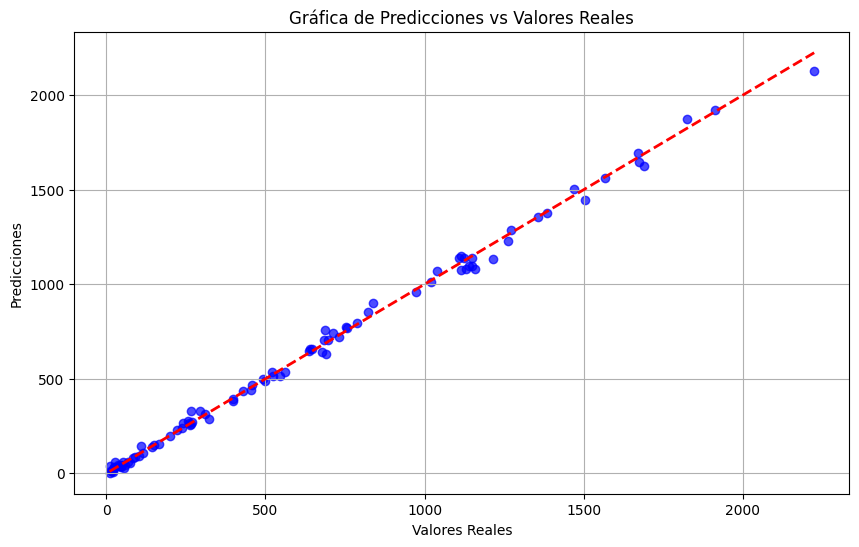

In [32]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de Predicciones vs Valores Reales')
plt.grid(True)
plt.show()

en base al codigo anterior se comparar y provaran los hiperparametros y sus ajustes.

In [33]:
#importaciones generales
# Importaciones generales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importación de modelos de regresión
from sklearn.linear_model import Lasso, ElasticNet, BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor

# Importación de herramientas de evaluación y optimización
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score


In [34]:
# definicion de modelos
lasso_model = Lasso()
elasticnet_model = ElasticNet()
kernelridge_model = KernelRidge()
sgd_model = SGDRegressor()
bayesian_ridge_model = BayesianRidge()


**LASSO**

Resultados de Validación Cruzada con Lasso (5 folds):
Mejores hiperparámetros: {'alpha': 10.0, 'fit_intercept': False, 'max_iter': 1000}
            Mean         Std
MAE    19.207110    2.506227
MSE   833.562778  235.402015
R2      0.996369    0.001324
MAPE    9.369869    4.555461

Resultados en el conjunto de prueba:
Mejores Hiperparámetros LASSO: {'alpha': 10.0, 'fit_intercept': False, 'max_iter': 1000}

Resultados conjunto de prueba:
MAE: 20.36509269348433, desviacion_std   2.506227110319216
MSE: 866.2501281315363, desviacion_std   235.40201496489925
R2: 0.9970795112800366, desviacion_std     0.0013239515325811002)
MAPE: 9.234719096282387, desviacion_std 4.555461317719345


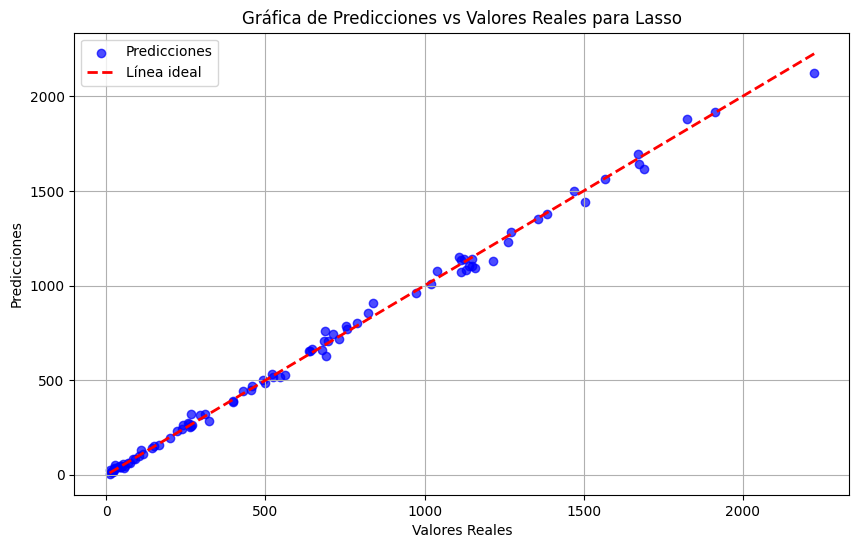

In [35]:
#hiperparámetros para Lasso
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000, 10000]
}

#busqueda de hiperparametro
grid_search = GridSearchCV(
    estimator=lasso_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Entrenamiento
grid_search.fit(X_train, y_train)

# meores hiperparametros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#validacion cruzada
cv_results = cross_validate(best_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# RESUMEN DE VALIDACION CRUZADA
results_summary = {
    metric: [np.mean(cv_results[f'test_{metric}']), np.std(cv_results[f'test_{metric}'])]
    for metric in scoring.keys()
}

# Convertir a un df
results_df = pd.DataFrame(results_summary, index=["Mean", "Std"]).T

# mostrara resultados
print("Resultados de Validación Cruzada con Lasso (5 folds):")
print("Mejores hiperparámetros:", best_params)
print(results_df)

# evalucion del modelo
y_pred = best_model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#resultados
print("\nResultados en el conjunto de prueba:")
print(f"Mejores Hiperparámetros LASSO: {best_params}")
print("\nResultados conjunto de prueba:")
print(f"MAE: {test_mae}, desviacion_std   {np.std(cv_results['test_MAE'])}")
print(f"MSE: {test_mse}, desviacion_std   {np.std(cv_results['test_MSE'])}")
print(f"R2: {test_r2}, desviacion_std     {np.std(cv_results['test_R2'])})")
print(f"MAPE: {test_mape}, desviacion_std {np.std(cv_results['test_MAPE'])}")

# Graficar los resultados de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', linewidth=2, label='Línea ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de Predicciones vs Valores Reales para Lasso')
plt.legend()
plt.grid(True)
plt.show()

# **ELASTICNET**

Resultados de Validación Cruzada con ElasticNet (5 folds):
Mejores hiperparámetros: {'alpha': 10.0, 'fit_intercept': False, 'l1_ratio': 0.5, 'max_iter': 1000}
            Mean         Std
MAE    19.246762    2.517036
MSE   832.086030  236.594490
R2      0.996375    0.001329
MAPE    9.586313    4.826303

Resultados en el conjunto de prueba:
Mejores Hiperparámetros: {'alpha': 10.0, 'fit_intercept': False, 'l1_ratio': 0.5, 'max_iter': 1000}
MAE: 20.370149902885327, desviacion_std   2.517035849949843
MSE: 855.429694471365, desviacion_std   236.59449007722912
R2: 0.9971159914529375, desviacion_std     0.0013288241699101664)
MAPE: 9.307617700328727, desviacion_std 4.826302535819877


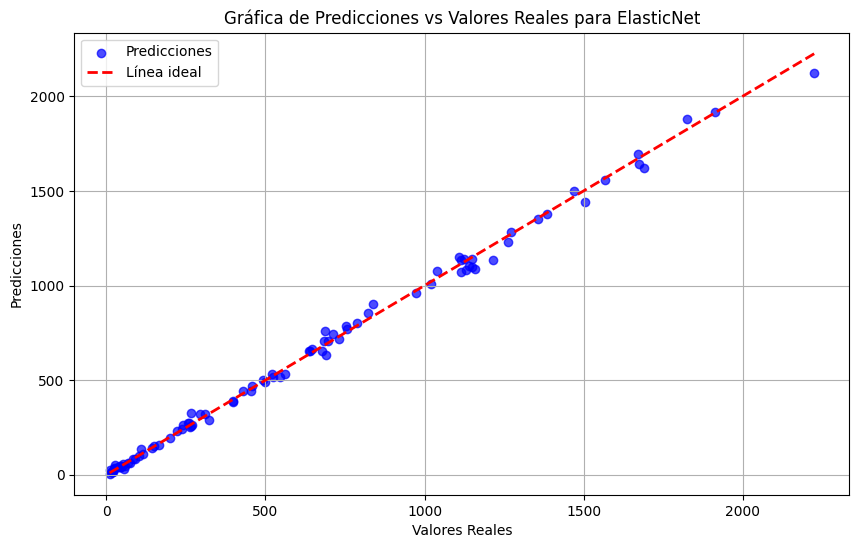

In [36]:
# Configurar el grid de hiperparámetros para ElasticNet
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0],  # Controla la mezcla entre L1 y L2
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000, 10000]
}

# busqueda de hiperparametros
grid_search = GridSearchCV(
    estimator=elasticnet_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

#etrenamiento
grid_search.fit(X_train, y_train)

# mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# validación cruzada con el mejor modelo
cv_results = cross_validate(best_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

#resultados de validación cruzada
results_summary = {
    metric: [np.mean(cv_results[f'test_{metric}']), np.std(cv_results[f'test_{metric}'])]
    for metric in scoring.keys()
}

# Convertir a DataFrame
results_df = pd.DataFrame(results_summary, index=["Mean", "Std"]).T

# Imprimir resultados de validación cruzada
print("Resultados de Validación Cruzada con ElasticNet (5 folds):")
print("Mejores hiperparámetros:", best_params)
print(results_df)

#en el conjunto de prueba
y_pred = best_model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nResultados en el conjunto de prueba:")
print(f"Mejores Hiperparámetros: {best_params}")
print(f"MAE: {test_mae}, desviacion_std   {np.std(cv_results['test_MAE'])}")
print(f"MSE: {test_mse}, desviacion_std   {np.std(cv_results['test_MSE'])}")
print(f"R2: {test_r2}, desviacion_std     {np.std(cv_results['test_R2'])})")
print(f"MAPE: {test_mape}, desviacion_std {np.std(cv_results['test_MAPE'])}")

# Graficar los resultados de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', linewidth=2, label='Línea ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de Predicciones vs Valores Reales para ElasticNet')
plt.legend()
plt.grid(True)
plt.show()


# ***KERNELRIDGE***

Resultados de Validación Cruzada con KernelRidge (5 folds):
Mejores hiperparámetros: {'alpha': 10.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}
            Mean         Std
MAE    19.656641    2.347039
MSE   839.419284  227.130270
R2      0.996347    0.001291
MAPE   11.420447    5.912466

Resultados en el conjunto de prueba KERNER RIDGE:
Mejores Hiperparámetros: {'alpha': 10.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}
MAE: 21.132694504446686, desviacion_std   2.347038714199912
MSE: 869.110554535709, desviacion_std   227.13027038969548
R2: 0.9970698675954051, desviacion_std     0.0012914053594159135)
MAPE: 12.683775433510307, desviacion_std 5.912465685046415


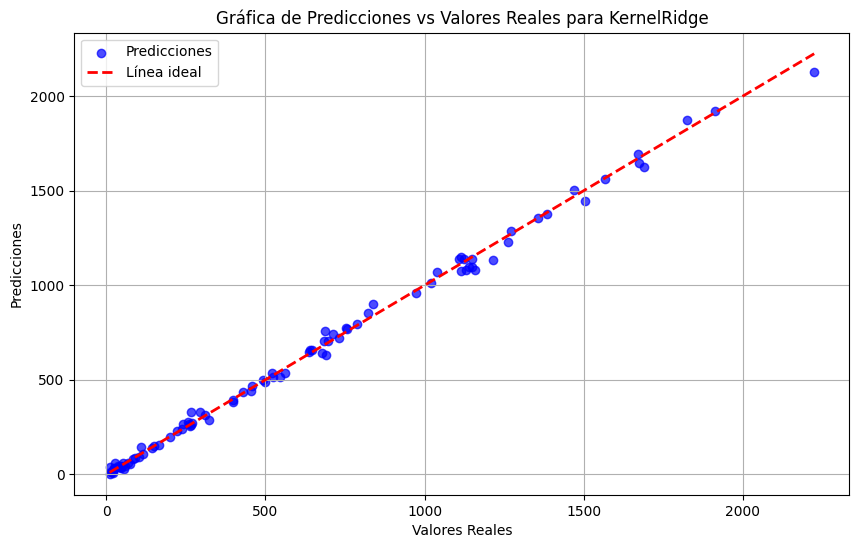

In [37]:
#grid de hiperparámetros para KernelRidge
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Regularización
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipos de kernel comunes
    'degree': [2, 3, 4],  # Solo aplicable para kernel 'poly'
    'gamma': [0.01, 0.1, 1.0]  # Coeficiente para kernels 'rbf', 'poly', y 'sigmoid'
}

#búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(
    estimator=kernelridge_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

#búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

#mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#validación cruzada con el mejor modelo
cv_results = cross_validate(best_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

#resultados de validación cruzada
results_summary = {
    metric: [np.mean(cv_results[f'test_{metric}']), np.std(cv_results[f'test_{metric}'])]
    for metric in scoring.keys()
}

# Convertir a DataFrame
results_df = pd.DataFrame(results_summary, index=["Mean", "Std"]).T

#resultados de validación cruzada
print("Resultados de Validación Cruzada con KernelRidge (5 folds):")
print("Mejores hiperparámetros:", best_params)
print(results_df)

#modelo final en el conjunto de prueba
y_pred = best_model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nResultados en el conjunto de prueba KERNER RIDGE:")
print(f"Mejores Hiperparámetros: {best_params}")
print(f"MAE: {test_mae}, desviacion_std   {np.std(cv_results['test_MAE'])}")
print(f"MSE: {test_mse}, desviacion_std   {np.std(cv_results['test_MSE'])}")
print(f"R2: {test_r2}, desviacion_std     {np.std(cv_results['test_R2'])})")
print(f"MAPE: {test_mape}, desviacion_std {np.std(cv_results['test_MAPE'])}")

#resultados de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', linewidth=2, label='Línea ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de Predicciones vs Valores Reales para KernelRidge')
plt.legend()
plt.grid(True)
plt.show()



**SGDRegresor**

Resultados de Validación Cruzada con SGDRegressor (5 folds):
Mejores hiperparámetros: {'alpha': 0.01, 'eta0': 1.0, 'learning_rate': 'adaptive', 'loss': 'huber', 'max_iter': 5000, 'penalty': 'l2'}
             Mean         Std
MAE     21.928528    3.833524
MSE   1078.087957  346.380922
R2       0.995406    0.001509
MAPE     6.653461    2.010104

Resultados en el conjunto de prueba:
Mejores Hiperparámetros SGDR : {'alpha': 0.01, 'eta0': 1.0, 'learning_rate': 'adaptive', 'loss': 'huber', 'max_iter': 5000, 'penalty': 'l2'}
MAE: 21.671895914084118, desviacion_std   3.8335239609040115
MSE: 1090.8728802028827, desviacion_std   346.3809215240435
R2: 0.9963222147528932,     desviacion_std     0.0015085159756447499)
MAPE: 4.993395548052567, desviacion_std 2.0101036528599963


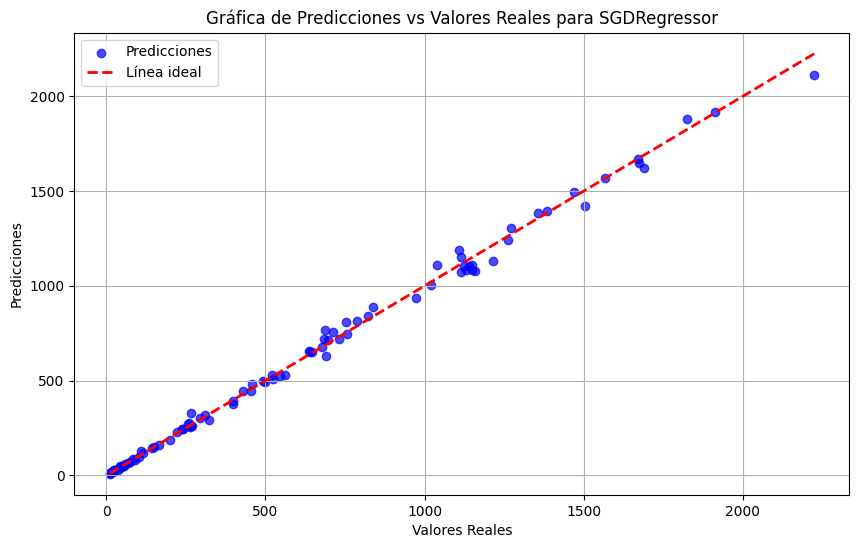

In [38]:
#hiperparámetros para SGDRegressor
param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],  # Funciones de pérdida
    'penalty': ['l2', 'l1', 'elasticnet'],  # Tipos de regularización
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularización
    'max_iter': [1000, 5000, 10000],  # Iteraciones máximas
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Estrategia de aprendizaje
    'eta0': [0.01, 0.1, 1.0]  # Tasa de aprendizaje inicial
}

#búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(
    estimator=sgd_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

#modelo con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

#mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#validación cruzada con el mejor modelo
cv_results = cross_validate(best_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

#resultados de validación cruzada
results_summary = {
    metric: [np.mean(cv_results[f'test_{metric}']), np.std(cv_results[f'test_{metric}'])]
    for metric in scoring.keys()
}

# Convertir a un df
results_df = pd.DataFrame(results_summary, index=["Mean", "Std"]).T

#resultados de validación cruzada
print("Resultados de Validación Cruzada con SGDRegressor (5 folds):")
print("Mejores hiperparámetros:", best_params)
print(results_df)

#modelo final en el conjunto de prueba
y_pred = best_model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nResultados en el conjunto de prueba:")
print(f"Mejores Hiperparámetros SGDR : {best_params}")
print(f"MAE: {test_mae}, desviacion_std   {np.std(cv_results['test_MAE'])}")
print(f"MSE: {test_mse}, desviacion_std   {np.std(cv_results['test_MSE'])}")
print(f"R2: {test_r2},     desviacion_std     {np.std(cv_results['test_R2'])})")
print(f"MAPE: {test_mape}, desviacion_std {np.std(cv_results['test_MAPE'])}")

#resultados de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', linewidth=2, label='Línea ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de Predicciones vs Valores Reales para SGDRegressor')
plt.legend()
plt.grid(True)
plt.show()

**BAYESIANRidge**

Resultados de Validación Cruzada con BayesianRidge (5 folds):
Mejores hiperparámetros: {'alpha_1': 1e-06, 'alpha_2': 0.0001, 'fit_intercept': True, 'lambda_1': 0.0001, 'lambda_2': 1e-06}
            Mean         Std
MAE    19.528807    2.403094
MSE   836.416578  231.732331
R2      0.996365    0.001289
MAPE   11.453212    5.951196

Resultados en el conjunto de prueba BAYESIAN RIDGE:
Mejores Hiperparámetros: {'alpha_1': 1e-06, 'alpha_2': 0.0001, 'fit_intercept': True, 'lambda_1': 0.0001, 'lambda_2': 1e-06}
MAE: 20.688824323882198, desviacion_std   2.403093962015125
MSE: 839.3908926794845, desviacion_std   231.73233114052778
R2: 0.9971700649106995, desviacion_std     0.0012894681755119266)
MAPE: 11.899361190683496, desviacion_std 5.951196317788506


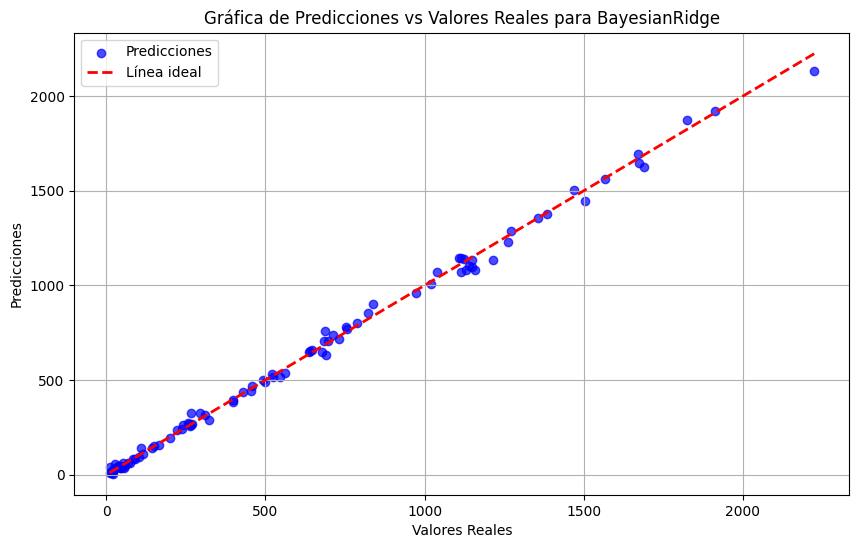

In [39]:
#hiperparámetros para BayesianRidge
param_grid = {
    'alpha_1': [1e-6, 1e-5, 1e-4],  # Parámetro de la distribución gamma para la varianza
    'alpha_2': [1e-6, 1e-5, 1e-4],  # Parámetro de la distribución gamma para el intercepto
    'lambda_1': [1e-6, 1e-5, 1e-4],  # Parámetro de la distribución gamma para los pesos
    'lambda_2': [1e-6, 1e-5, 1e-4],  # Parámetro de la distribución gamma para la regularización
    'fit_intercept': [True, False]  # Ajuste del intercepto
}

#hiperparámetros con GridSearchCV
grid_search = GridSearchCV(
    estimator=bayesian_ridge_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

#modelo con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

#mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#validación cruzada con el mejor modelo
cv_results = cross_validate(best_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

#resultados de validación cruzada
results_summary = {
    metric: [np.mean(cv_results[f'test_{metric}']), np.std(cv_results[f'test_{metric}'])]
    for metric in scoring.keys()
}

# Convertir a un df
results_df = pd.DataFrame(results_summary, index=["Mean", "Std"]).T

#resultados de validación cruzada
print("Resultados de Validación Cruzada con BayesianRidge (5 folds):")
print("Mejores hiperparámetros:", best_params)
print(results_df)

#modelo final en el conjunto de prueba
y_pred = best_model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nResultados en el conjunto de prueba BAYESIAN RIDGE:")
print(f"Mejores Hiperparámetros: {best_params}")
print(f"MAE: {test_mae}, desviacion_std   {np.std(cv_results['test_MAE'])}")
print(f"MSE: {test_mse}, desviacion_std   {np.std(cv_results['test_MSE'])}")
print(f"R2: {test_r2}, desviacion_std     {np.std(cv_results['test_R2'])})")
print(f"MAPE: {test_mape}, desviacion_std {np.std(cv_results['test_MAPE'])}")

# Graficar los resultados de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', linewidth=2, label='Línea ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de Predicciones vs Valores Reales para BayesianRidge')
plt.legend()
plt.grid(True)
plt.show()

**Gps REGRESSOR **

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: Conv

Resultados de Validación Cruzada con GaussianProcessRegressor (5 folds):
Mejores hiperparámetros: {'kernel': 1**2 * RationalQuadratic(alpha=1, length_scale=1)}
             Mean          Std
MAE     36.246697     5.351896
MSE   4458.853287  1774.635700
R2       0.981975     0.004088
MAPE     7.176750     1.083372

Resultados en el conjunto de prueba:
Mejores Hiperparámetros: {'kernel': 1**2 * RationalQuadratic(alpha=1, length_scale=1)}
MAE: 34.71986091414948
MSE: 4321.4803455458605
R2: 0.9854304961201762
MAPE: 6.867518453341348


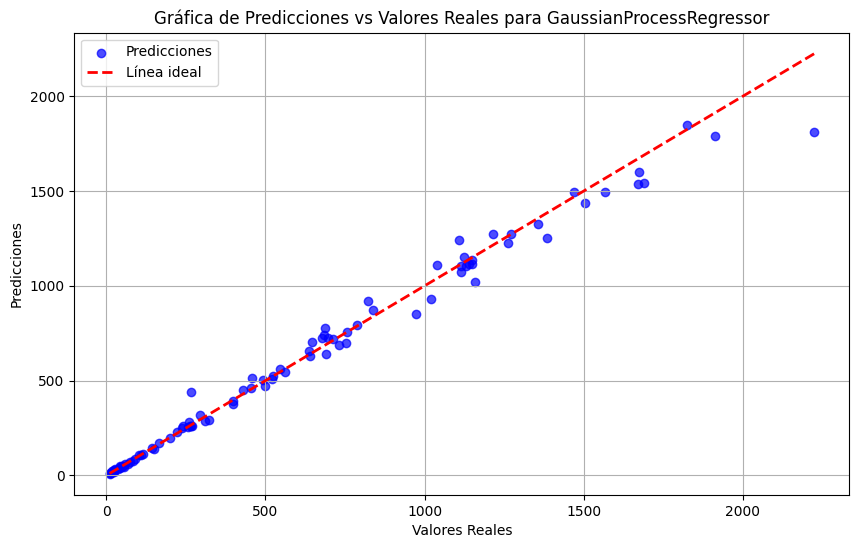

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic as RQ
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Dividir los datos en variables predictoras y objetivo
X = base_datos_alta_correlacion.drop(columns=['Puntos'])
y = base_datos_alta_correlacion['Puntos']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo base
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-3, 1e3))
gaussian_process_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Definir las métricas de evaluación
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score),
    'MAPE': make_scorer(lambda y_true, y_pred: np.mean(np.abs((y_true - y_pred) / y_true)) * 100, greater_is_better=True)
}
# Ajustar el kernel y los límites de los parámetros
kernel = C(1.0, (1e-3, 1e4)) * RBF(length_scale=1.0, length_scale_bounds=(1e-3, 1e4))

# Param grid actualizado
param_grid = {
    'kernel': [
        C(1.0, (1e-2, 1e4)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e4)),
        C(1.0, (1e-2, 1e4)) * RQ(alpha=1.0, length_scale=1.0),
        C(1.0, (1e-2, 1e4)) * (RBF(length_scale=1.0) + RQ(alpha=1.0, length_scale=1.0))
    ]
}



# Realizar búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(
    estimator=gaussian_process_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Entrenar el modelo con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar validación cruzada con el mejor modelo
cv_results = cross_validate(best_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Resumir resultados de validación cruzada
results_summary = {
    metric: [np.mean(cv_results[f'test_{metric}']), np.std(cv_results[f'test_{metric}'])]
    for metric in scoring.keys()
}

# Convertir a DataFrame
results_df = pd.DataFrame(results_summary, index=["Mean", "Std"]).T

# Imprimir resultados de validación cruzada
print("Resultados de Validación Cruzada con GaussianProcessRegressor (5 folds):")
print("Mejores hiperparámetros:", best_params)
print(results_df)

# Evaluar el modelo final en el conjunto de prueba
y_pred = best_model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nResultados en el conjunto de prueba:")
print(f"Mejores Hiperparámetros: {best_params}")
print(f"MAE: {test_mae}, desviacion_std   {np.std(cv_results['test_MAE'])}")
print(f"MSE: {test_mse}, desviacion_std   {np.std(cv_results['test_MSE'])}")
print(f"R2: {test_r2}, desviacion_std     {np.std(cv_results['test_R2'])})")
print(f"MAPE: {test_mape}, desviacion_std {np.std(cv_results['test_MAPE'])}")

# Graficar los resultados de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', linewidth=2, label='Línea ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de Predicciones vs Valores Reales para GaussianProcessRegressor')
plt.legend()
plt.grid(True)
plt.show()


**RAMDOMFOREST REGRESSOR**

In [ ]:
random_forest_model = RandomForestRegressor(random_state=42)

#hiperparámetros para RandomForestRegressor


param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en una hoja
    'bootstrap': [True, False]  # Uso de bootstrap para muestreo
}

#hiperparámetros con GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

#búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

#mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#validación cruzada con el mejor modelo
cv_results = cross_validate(best_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

#resultados de validación cruzada
results_summary = {
    metric: [np.mean(cv_results[f'test_{metric}']), np.std(cv_results[f'test_{metric}'])]
    for metric in scoring.keys()
}

# Convertir a un df
results_df = pd.DataFrame(results_summary, index=["Mean", "Std"]).T

#resultados de validación cruzada
print("Resultados de Validación Cruzada con RandomForestRegressor (5 folds):")
print("Mejores hiperparámetros:", best_params)
print(results_df)

#modelo final en el conjunto de prueba
y_pred = best_model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nResultados en el conjunto de prueba:")
print(f"Mejores Hiperparámetros: {best_params}")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"R2: {test_r2}")
print(f"MAPE: {test_mape}")

#resultados de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', linewidth=2, label='Línea ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de Predicciones vs Valores Reales para RandomForestRegressor')
plt.legend()
plt.grid(True)
plt.show()


**SVR**

In [ ]:
svm_model = SVR()

#métricas de evaluación
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score),
    'MAPE': make_scorer(lambda y_true, y_pred: np.mean(np.abs((y_true - y_pred) / y_true)) * 100, greater_is_better=True)
}

#grid de hiperparámetros para SVR
param_grid = {
    'kernel': ['linear'],  # Tipos de kernel
    'C': [0.1, 1, 10, 100],  # Parámetro de regularización
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Coeficiente del kernel
    'degree': [2, 3, 4]  # Grado del polinomio para el kernel 'poly'
}

#búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

#búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#validación cruzada con el mejor modelo
cv_results = cross_validate(best_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

#resultados de validación cruzada
results_summary = {
    metric: [np.mean(cv_results[f'test_{metric}']), np.std(cv_results[f'test_{metric}'])]
    for metric in scoring.keys()
}

# Convertir a un df
results_df = pd.DataFrame(results_summary, index=["Mean", "Std"]).T

#resultados de validación cruzada
print("Resultados de Validación Cruzada con SVR (5 folds):")
print("Mejores hiperparámetros:", best_params)
print(results_df)

#modelo final en el conjunto de prueba
y_pred = best_model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nResultados en el conjunto de prueba:")
print(f"Mejores Hiperparámetros     SVR: {best_params}")

print(f"MAE: {test_mae}, desviacion_std   {np.std(cv_results['test_MAE'])}")
print(f"MSE: {test_mse}, desviacion_std   {np.std(cv_results['test_MSE'])}")
print(f"R2: {test_r2}, desviacion_std     {np.std(cv_results['test_R2'])})")
print(f"MAPE: {test_mape}, desviacion_std {np.std(cv_results['test_MAPE'])}")

# resultados de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', linewidth=2, label='Línea ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de Predicciones vs Valores Reales para SVR')
plt.legend()
plt.grid(True)
plt.show()
